In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [24]:
from keras import backend as K

In [3]:
#load dataset
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [4]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
Num_classes=10
classes=["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

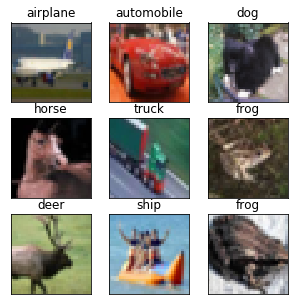

In [14]:
#Visualizing dataset
fig,subaxes=plt.subplots(3,3,figsize=(5,5))
index=list(np.random.permutation(range(1,100)))[1:10]
index=np.array(index).reshape([3,3])
for axesrow,indexrow in zip(subaxes,index):
    for axescolumn,indexcolumn in zip(axesrow,indexrow):
        axescolumn.imshow(X_train[indexcolumn])
        axescolumn.set_title(classes[np.squeeze(y_train[indexcolumn])])
        axescolumn.get_xaxis().set_visible(False)
        axescolumn.get_yaxis().set_visible(False)

In [19]:
# Preprocessing of data
X_train1=X_train/255
X_test1=X_test/255
y_train1=np.eye(Num_classes)[y_train.reshape(-1)]
y_test1=np.eye(Num_classes)[y_test.reshape(-1)]

In [20]:
y_train1.shape, y_test1.shape

((50000, 10), (10000, 10))

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
    

In [34]:
def make_model():
    model=Sequential()
    model.add(Conv2D(16,(3,3),input_shape=[32,32,3],padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.25))
    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(128,(3,3),padding='valid'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [35]:
K.clear_session()
model=make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [36]:
INIT_LR=9e-3
Batch_size=64
num_epoch=10
K.clear_session()
model=make_model()
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.adamax(lr=INIT_LR),
             metrics=['accuracy'])

def lr_scheduler(epoch):
    return INIT_LR*0.9**epoch
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self,epoch,logs={}):
        print("Learning rate: ", K.get_value(model.optimizer.lr))

model.fit(X_train1,y_train1, batch_size=Batch_size,epochs=num_epoch,
         callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), LrHistory()],
         validation_data=(X_test1,y_test1), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
Learning rate:  0.009
50000/50000 [==============================] - 256s 5ms/step - loss: 1.6206 - acc: 0.4169 - val_loss: 1.6882 - val_acc: 0.4559
Epoch 2/10
Learning rate:  0.0081
50000/50000 [==============================] - 256s 5ms/step - loss: 1.1213 - acc: 0.6000 - val_loss: 1.2867 - val_acc: 0.5725
Epoch 3/10
Learning rate:  0.00729
50000/50000 [==============================] - 266s 5ms/step - loss: 0.9045 - acc: 0.6835 - val_loss: 0.9472 - val_acc: 0.6692
Epoch 4/10
Learning rate:  0.006561
50000/50000 [==============================] - 290s 6ms/step - loss: 0.7631 - acc: 0.7331 - val_loss: 0.9716 - val_acc: 0.6818
Epoch 5/10
Learning rate:  0.0059049
50000/50000 [==============================] - 256s 5ms/step - loss: 0.6417 - acc: 0.7750 - val_loss: 0.8170 - val_acc: 0.7266
Epoch 6/10
Learning rate:  0.00531441
50000/50000 [==============================] - 259s 5ms/step - loss: 0.5449 - acc: 0.8089 - val_loss: 

In [37]:
y_pred_test=model.predict_proba(X_test1)
y_pred_test_classes=np.argmax(y_pred_test,axis=1)


In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test_classes))

0.7594


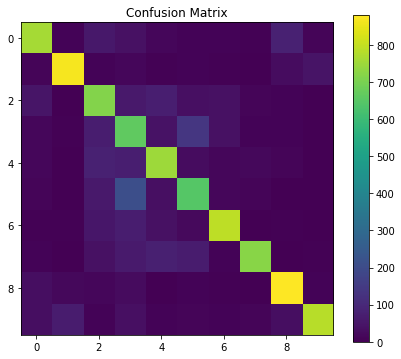

In [39]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,6))
plt.imshow(confusion_matrix(y_test,y_pred_test_classes))
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

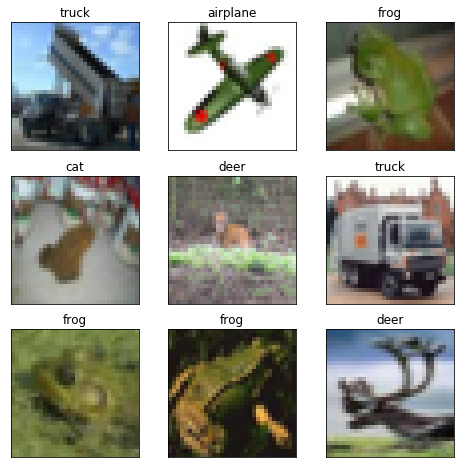

In [41]:
# Visualize the output result
fig, subaxes= plt.subplots(3,3,figsize=(8,8))
index=list(np.random.permutation(range(1,100)))[1:10]
index=np.array(index).reshape([3,3])
for axesrow,indexrow in zip(subaxes,index):
    for axescolumn,indexcolumn in zip(axesrow,indexrow):
        axescolumn.imshow(X_test[indexcolumn])
        axescolumn.set_title(classes[y_pred_test_classes[indexcolumn]])
        axescolumn.get_xaxis().set_visible(False)
        axescolumn.get_yaxis().set_visible(False)
        